In [45]:
# Final Project: Personality Prediction Based on Behavioral Data


In [46]:
## 2. Load Dataset

In [47]:
import pandas as pd
import numpy as np

# Load your dataset
file_path = "C:/Users/mhesh/Downloads/archive (2)/personality_datasert.csv"
df = pd.read_csv(file_path)

df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
## 3. Initial Data Exploration

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [49]:
df['Going_outside'].isnull().sum()
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [50]:
df['Time_spent_Alone'].dropna().apply(float.is_integer).all()
# Check for missing values in the 'Going_outside' column

False

In [51]:
print(df['Time_spent_Alone'])
print(df['Time_spent_Alone'].apply(type))
# Convert 'Time_spent_Alone' to numeric, forcing errors to NaN

0        4.0
1        9.0
2        9.0
3        0.0
4        3.0
        ... 
2895     3.0
2896     3.0
2897     4.0
2898    11.0
2899     3.0
Name: Time_spent_Alone, Length: 2900, dtype: float64
0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
2895    <class 'float'>
2896    <class 'float'>
2897    <class 'float'>
2898    <class 'float'>
2899    <class 'float'>
Name: Time_spent_Alone, Length: 2900, dtype: object


In [ ]:
## 4. Data Cleaning: Convert Float Columns to Int

In [52]:
columns_to_convert = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

# Convert floats in those columns to integers (drop decimal part)
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


In [53]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,No,4,6,No,13,5,Extrovert
1,9,Yes,0,0,Yes,0,3,Introvert
2,9,Yes,1,2,Yes,5,2,Introvert
3,0,No,6,7,No,14,8,Extrovert
4,3,No,9,4,No,8,5,Extrovert


In [ ]:
## 5. Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,0,4,6,0,13,5,0
1,9,1,0,0,1,0,3,1
2,9,1,1,2,1,5,2,1
3,0,0,6,7,0,14,8,0
4,3,0,9,4,0,8,5,0


In [ ]:
## 7. Correlation Heatmap

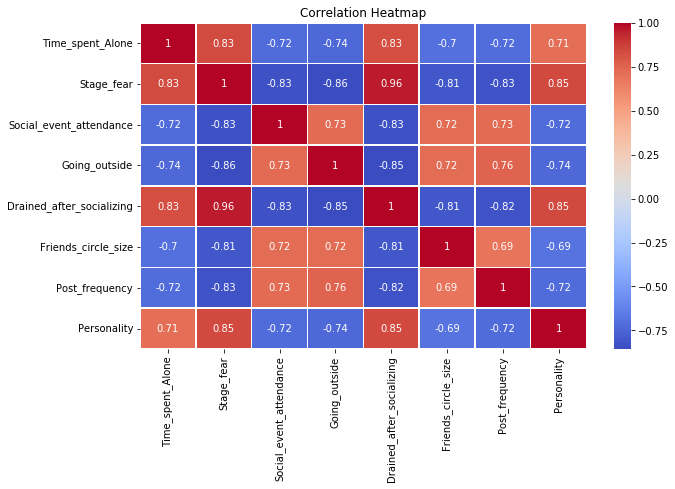

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# Pairplot for visualizing relationships

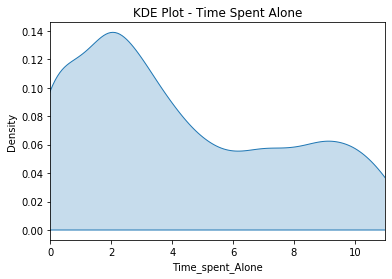

In [69]:
sns.kdeplot(data=df, x="Time_spent_Alone", fill=True)
plt.title("KDE Plot - Time Spent Alone")
plt.xlabel("Time_spent_Alone")
plt.xlim(0, df["Time_spent_Alone"].max())  # Limit x-axis to actual data range
plt.show()



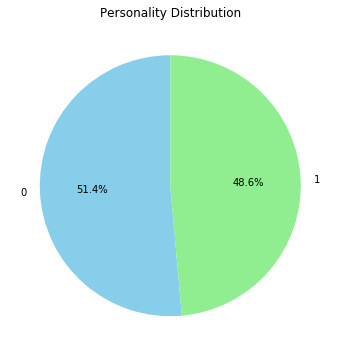

In [68]:
plt.figure(figsize=(6, 6))
df['Personality_Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title("Personality Distribution")
plt.ylabel('')
plt.show()


In [ ]:
## 8. Count Plots of Binary Features

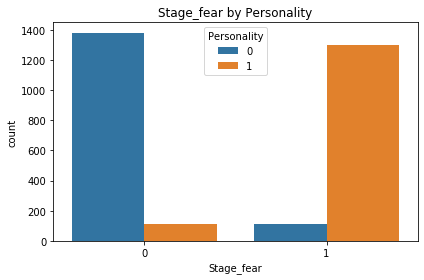

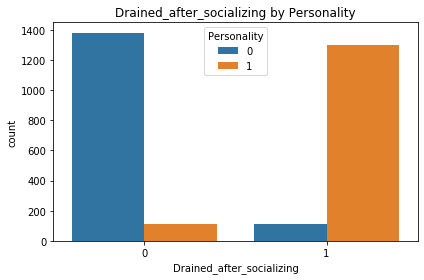

In [56]:
binary_features = ['Stage_fear', 'Drained_after_socializing']

for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Personality', data=df)
    plt.title(f"{feature} by Personality")
    plt.tight_layout()
    plt.show()
# Pairplot for visualizing relationships


In [ ]:
## 9. Boxplots of Highly Correlated Features

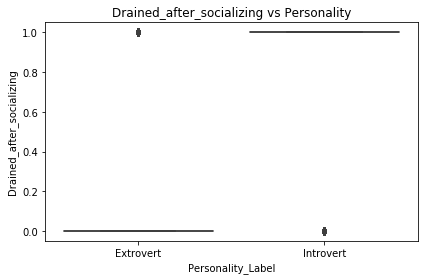

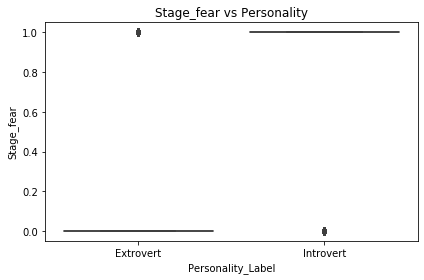

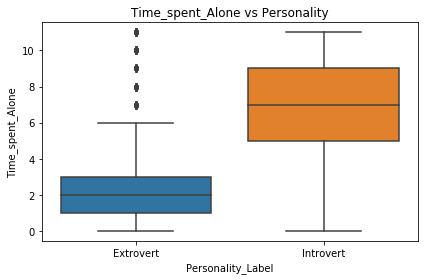

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Personality_Label exists
df['Personality_Label'] = df['Personality'].map({0: 'Extrovert', 1: 'Introvert'})

# Features with high positive correlation to Personality
high_corr_features = ['Drained_after_socializing', 'Stage_fear', 'Time_spent_Alone']

# Plot boxplots
for feature in high_corr_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Personality_Label', y=feature, data=df)
    plt.title(f"{feature} vs Personality")
    plt.tight_layout()
    plt.show()


In [ ]:
## 10. Outlier Handling for Extroverts (Time_spent_Alone)

In [58]:
import numpy as np

# Create a mask for extroverts
extroverts = df['Personality_Label'] == 'Extrovert'

# Get Time_spent_Alone values for extroverts
ext_values = df.loc[extroverts, 'Time_spent_Alone']

# Calculate IQR
Q1 = ext_values.quantile(0.25)
Q3 = ext_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Compute median for replacement
median_value = ext_values.median()

# Replace outliers with median
df.loc[extroverts & ((ext_values < lower_bound) | (ext_values > upper_bound)), 'Time_spent_Alone'] = median_value
# Verify replacement

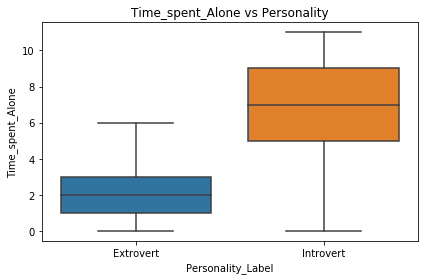

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Personality_Label exists
df['Personality_Label'] = df['Personality'].map({0: 'Extrovert', 1: 'Introvert'})

# Features with high positive correlation to Personality
high_corr_features = ['Time_spent_Alone']

# Plot boxplots
for feature in high_corr_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Personality_Label', y=feature, data=df)
    plt.title(f"{feature} vs Personality")
    plt.tight_layout()
    plt.show()

In [60]:
# Normalize and invert positively correlated columns
df['social_activity_score'] = (
    (df['Stage_fear'].max() - df['Stage_fear']) +
    (df['Drained_after_socializing'].max() - df['Drained_after_socializing']) +
    (df['Time_spent_Alone'].max() - df['Time_spent_Alone'])
)
# Normalize the score to a range of 0 to 1

In [61]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_Label,social_activity_score
0,4,0,4,6,0,13,5,0,Extrovert,9
1,9,1,0,0,1,0,3,1,Introvert,2
2,9,1,1,2,1,5,2,1,Introvert,2
3,0,0,6,7,0,14,8,0,Extrovert,13
4,3,0,9,4,0,8,5,0,Extrovert,10


In [62]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Personality_Label']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()






,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_Label,social_activity_score
0,4,0,4,6,0,13,5,0,0,9
1,9,1,0,0,1,0,3,1,1,2
2,9,1,1,2,1,5,2,1,1,2
3,0,0,6,7,0,14,8,0,0,13
4,3,0,9,4,0,8,5,0,0,10


In [ ]:
## 12. Feature Selection and Model Training

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




features = [
    'Time_spent_Alone',
    'Stage_fear',
    'Drained_after_socializing',
]    
X = df[features]


# Define the target
y = df['Personality_Label']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("📊 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 5. Random Forest model (recommended)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("📊 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📊 Decision Tree Results
Accuracy: 0.9603448275862069
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       302
           1       0.98      0.94      0.96       278

    accuracy                           0.96       580
   macro avg       0.96      0.96      0.96       580
weighted avg       0.96      0.96      0.96       580

📊 Random Forest Results
Accuracy: 0.9603448275862069
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       302
           1       0.98      0.94      0.96       278

    accuracy                           0.96       580
   macro avg       0.96      0.96      0.96       580
weighted avg       0.96      0.96      0.96       580



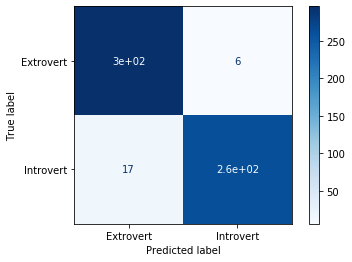

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)  # or y_pred_dt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")


In [65]:
import joblib
# === SAVE MODEL AND FEATURE LIST ===
import os
print("Saving in directory:", os.getcwd())
joblib.dump(rf, 'personality3_model.pkl')
joblib.dump(features, 'features3.pkl')

print("✅ Model and features saved successfully!")


Saving in directory: C:\Users\mhesh
✅ Model and features saved successfully!
